# code=8

In [1]:
# developing complex xnn model

In [2]:
# import modeles
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras   #using keras libraray we can build cnn


# loading data

In [3]:
import tensorflow.keras as tk #to download dataset from keras database
# download dataset txain and test data set from keras database
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

# to store the labels of the data

In [4]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","coat","Sandel","Shirt","Sneaker","Bag","Ankle boot"]
# this if the list of labels

# change the dimention. CNN input data should in 4Dimentional

In [5]:
# we have to convert our data in to 4 dimention 
# because cnn model need in 4D to train

# througn .expand_dims() method we can change the dimention of data or an array
x_train=np.expand_dims(x_train, -1)       #takes first argument dataset and 
                                          #second argument is rows and columns in array   
# x_test=np.expand_dims(x_test, -1)   

# feature scaling

In [6]:
# before sacling we have data between 0 to 255 
# after sacling we will get data between 0 to 1 by dividing each and every cell with 255

x_train= x_train/255
x_test= x_test/255

print("after scaling*********************************************************")
print(x_train[0])

after scaling*********************************************************
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.     

# validation data to train while traning

In [7]:
# we have to split some data from traning data to test model while traning
# to get validation data

# we have to import sklearn sub module
from sklearn.model_selection import train_test_split #to split data
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=2020)

# shape of x_val and y_val
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


# building complex convolutional Neural Network

In [8]:
# To build cnn model we have to import kesar library
# And then load models from keras
# and the call the sequential() method
# we have to put several layers inside sequential layer

model1=keras.models.Sequential([
#     adding first layer means using dataset we will perforn convolutional operation
#   first  convolutional layer
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="valid", activation="relu", input_shape=[28,28,1]), 
#     max pooling
    keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling

    
#   2nd  convolutional layer
    keras.layers.Conv2D(filters=64, kernel_size=3, strides= (1,1), padding="same", activation="relu"),
#     max pooling
    keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling
    
    
# 3rd layer
    keras.layers.Flatten(), #this will flatten every image in single vector
    
#     to train neural networ we have to use dense layer
#     input layer
    keras.layers.Dense(units=128 , activation="relu"),
     keras.layers.Dropout(0.25),
    
#     output layer
    keras.layers.Dense(units=256 , activation="relu"),
      keras.layers.Dropout(0.25),
    
    keras.layers.Dense(units=128 , activation="relu"),
    keras.layers.Dense(units=10 , activation="softmax")
   
])

In [ ]:
# this modelis one of the most complex model which gives good accuracy at traning but not at testing 

# model1=keras.models.Sequential([

#     keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="valid", activation="relu", input_shape=[28,28,1]), 

#     keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling

#     keras.layers.Conv2D(filters=128, kernel_size=3, strides= (1,1), padding="same", activation="relu"),

#     keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling
    
#     keras.layers.Conv2D(filters=64, kernel_size=3, strides= (2,2), padding="same", activation="relu"),

#     keras.layers.MaxPooling2D(pool_size=(2,2)), #for downsampling
    
#     keras.layers.Flatten(), #this will flatten every image in single vector

#     keras.layers.Dense(units=128 , activation="relu"),
#     keras.layers.Dropout(0.25),
    
#     keras.layers.Dense(units=256 , activation="relu"),
#     keras.layers.Dropout(0.5),
    
#     keras.layers.Dense(units=256 , activation="relu"),
#     keras.layers.Dropout(0.25),
    
#     keras.layers.Dense(units=128 , activation="relu"),
#     keras.layers.Dropout(0.10),
    
#     keras.layers.Dense(units=10 , activation="softmax")
   
# ])

# to check the summery of the model

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# to complie model

In [10]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# train model

In [11]:
# to train model we have to write name of model and fit function
# we have to pass two parameters
model1.fit(x_train,y_train , epochs=20, batch_size=512, verbose=1, validation_data=(x_val,y_val))

Epoch 1/20
94/94 [==============================] - 25s 256ms/step - loss: 0.9035 - accuracy: 0.6563 - val_loss: 0.5238 - val_accuracy: 0.7890
Epoch 2/20
94/94 [==============================] - 24s 258ms/step - loss: 0.4987 - accuracy: 0.8141 - val_loss: 0.4140 - val_accuracy: 0.8496
Epoch 3/20
94/94 [==============================] - 24s 256ms/step - loss: 0.4108 - accuracy: 0.8506 - val_loss: 0.3581 - val_accuracy: 0.8683
Epoch 4/20
94/94 [==============================] - 28s 303ms/step - loss: 0.3593 - accuracy: 0.8696 - val_loss: 0.3152 - val_accuracy: 0.8822
Epoch 5/20
94/94 [==============================] - 30s 324ms/step - loss: 0.3242 - accuracy: 0.8816 - val_loss: 0.3202 - val_accuracy: 0.8777
Epoch 6/20
94/94 [==============================] - 25s 265ms/step - loss: 0.2998 - accuracy: 0.8908 - val_loss: 0.3038 - val_accuracy: 0.8871
Epoch 7/20
94/94 [==============================] - 24s 254ms/step - loss: 0.2824 - accuracy: 0.8974 - val_loss: 0.2699 - val_accuracy: 0.9025

# test the model

In [12]:
# model.predict(x_test[0]) #this will occur the error
# we have to give 4 dimention data to model 
# x_test=np.expand_dims(x_test, axis=0) #now this ie 4 dimention data we can assign to model

model1.predict(np.expand_dims(x_test[0], axis=0)).round(2)
# the below array discribe the labels to match with 
# the item at index[0] relates the 9 label and model is 99% sure about it.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# to find maximum predicted value out of all predictions according to labels

In [13]:
np.argmax(model1.predict(np.expand_dims(x_test[0], axis=0)).round(2))

y_test[0] # cross checking this is actual label of the item intest data at [0] index 

# test on may images from test dataset
y_pred=model1.predict(x_test).round(2)
y_pred


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# evalute model with (x_test,y_test)

In [14]:
# to check the accuracy of model at test dataset
model1.evaluate(x_test, y_test)
# 89.48% accuracy this means our model is good to diliver
# not over fitting not under fitting

313/313 [==============================] - 3s 8ms/step - loss: 0.2576 - accuracy: 0.9147


[0.25763630867004395, 0.9146999716758728]

# Visualize output

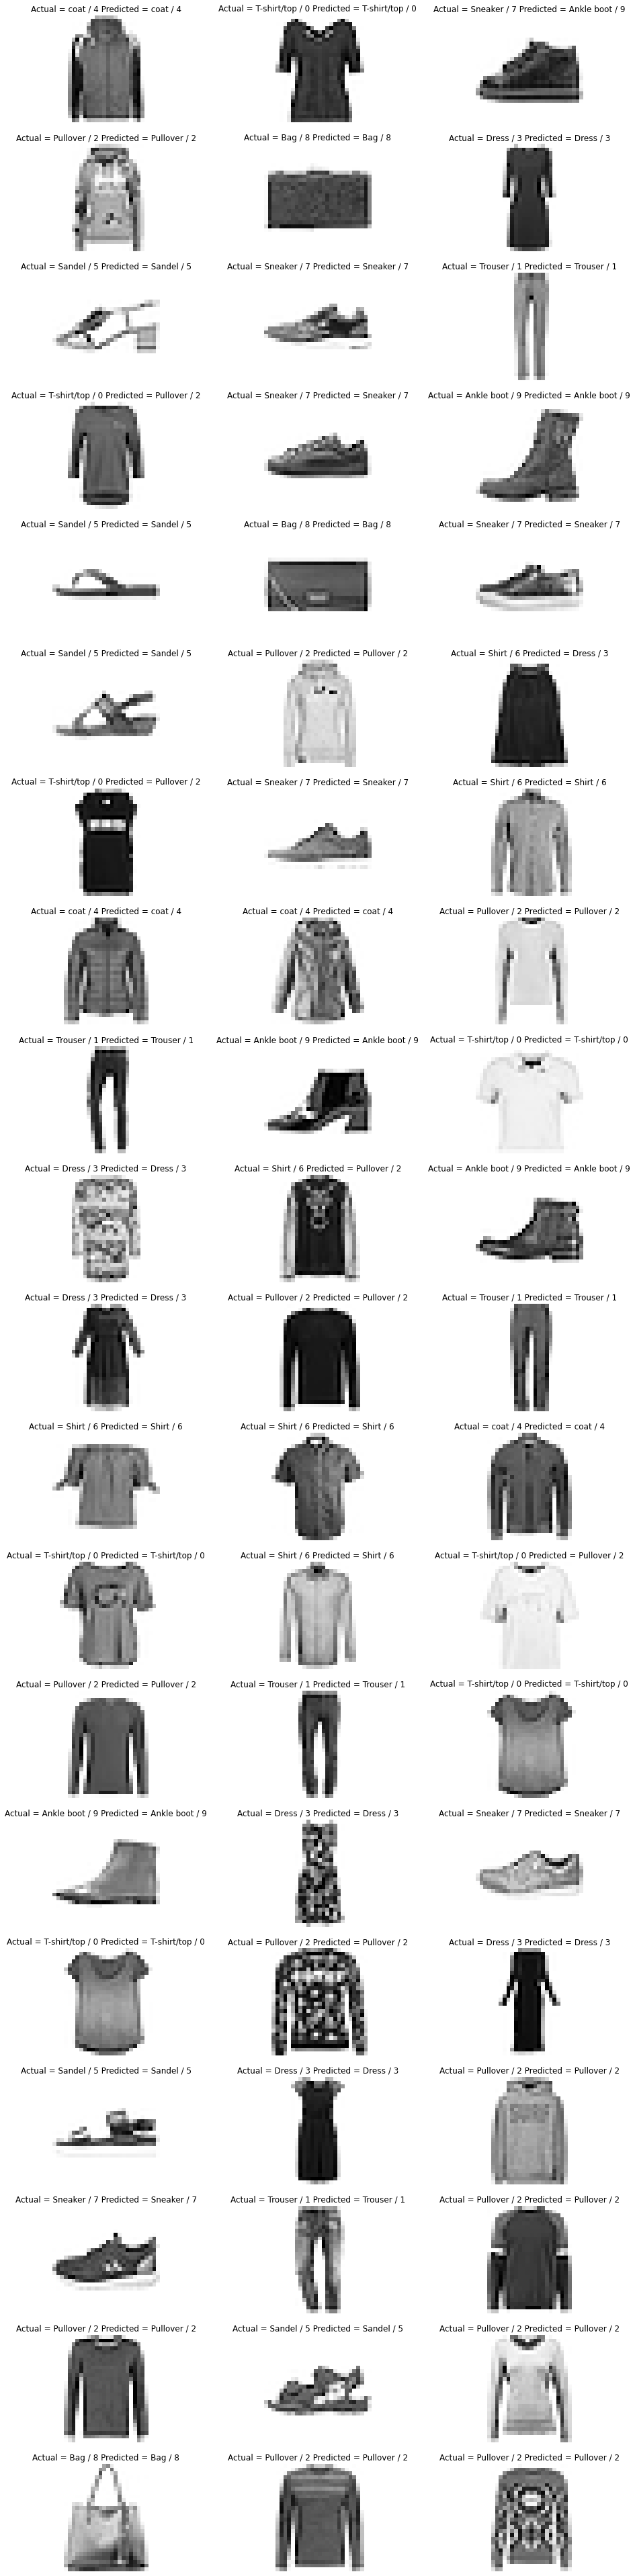

In [15]:
plt.figure(figsize=(16,70))
j=1
for i in np.random.randint(0,10000,60):
    plt.subplot(20,3,j); j +=1
    plt.imshow(x_test[i].reshape(28,28),cmap="Greys")
    plt.title("Actual = {} / {} Predicted = {} / {}".format(class_labels[y_test[i]], y_test[i],class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

# confusion matrix  

<AxesSubplot:>

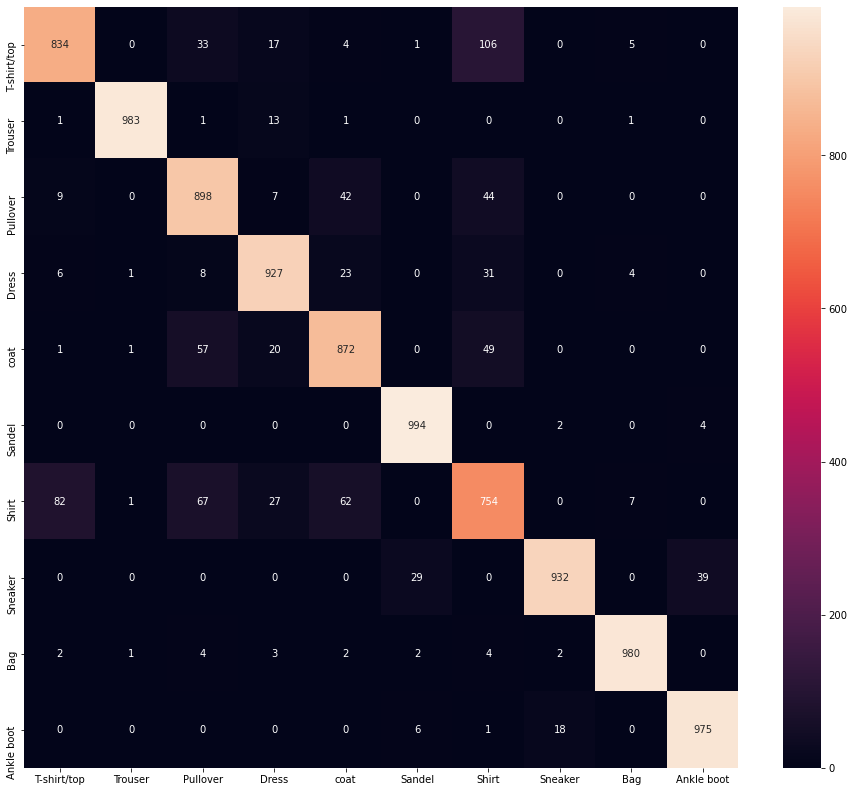

In [16]:
#  to draw confusion matrix we have to import sklearn library
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,14))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

# to show confusion matrix
sns.heatmap(cm , annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# classification report

<AxesSubplot:>

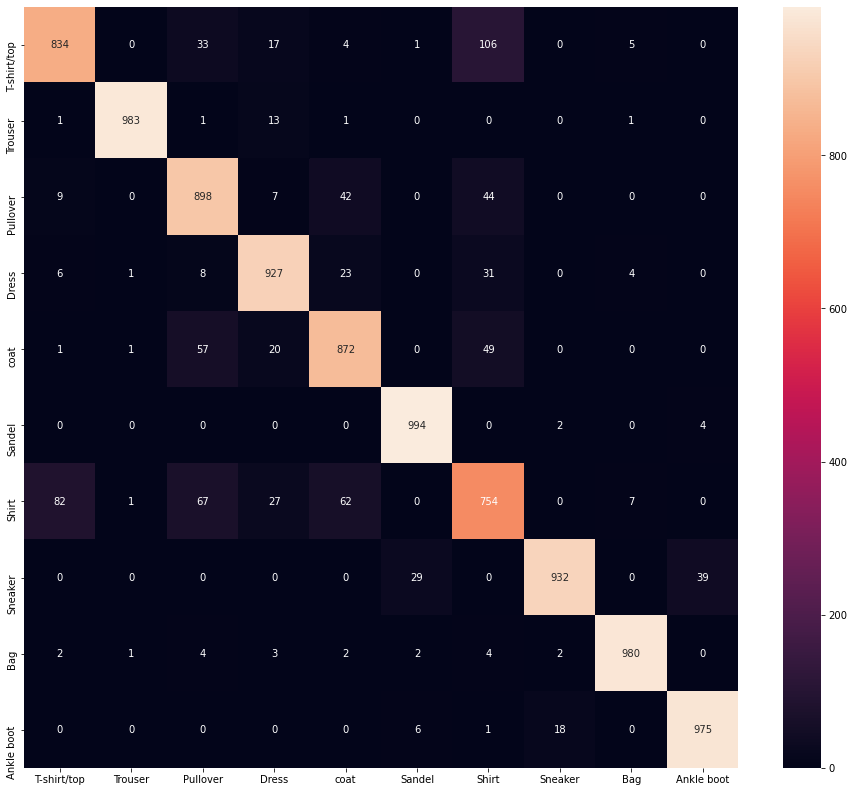

In [17]:
#  to draw confusion matrix we have to import sklearn library
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,14))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

# to show confusion matrix
sns.heatmap(cm , annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# save model

In [18]:
#  in deep learning we donot need any library to save model
# in machine learing like decision tree n svm ets need some libraries to save model

In [20]:
model1.save("comple_cnn_model.h5") #we have to add .5 extention with model name
# in this case the model is saved within the same folder where this code file exist

# to save a model in specific folder

In [ ]:
model1.save("E:\comple_cnn_model.h5") 

# to load model

In [ ]:
myOwnModel= keras.models.load_model("E:\comple_cnn_model.h5") #function to load model

In [ ]:
# to checking weather the model is working correctly or not
myOwnModel.predict(x_test).round(2)


# predict single value

In [ ]:
myOwnModel.predict(np.expand_dims(x_test[0] , axis=0)).round(2) #we have to give 4 dimention data to cnn model we have converted into 4 dims here

# to find mam value in the array

In [ ]:
np.argmax(myOwnModel.predict(np.expand_dims(x_test[0] , axis=0)).round(2))